In [10]:
import matplotlib
from transformers import DetrImageProcessor, DetrForObjectDetection, AutoImageProcessor, AutoModelForObjectDetection
import torch
import  torchvision.transforms as T
import matplotlib.pyplot as plt
import PIL.Image
import io
matplotlib.use("agg")

MODEL = 'facebook/detr-resnet-50'
REVISION = 'no_timm'

# COCO classes
CLASSES = [
    'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack',
    'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
    'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

# standard PyTorch mean-std input image normalization
transform = T.Compose([
    T.Resize(800),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


def plot_results(pil_img, prob, boxes, labels):
    fig = plt.figure(figsize=(15,10))
    plt.imshow(pil_img)
    
    ax = plt.gca()
    for p, (xmin, ymin, xmax, ymax), c, label in zip(prob, boxes.tolist(), COLORS * 100, labels):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))

        text = f'{CLASSES[label]}: {p :0.4f}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    ax.axis('off')
    plt.box(False)
    ax.margins(x=0, y=0)
    
    return fig



def predict_image(image, threshold):
    processor = DetrImageProcessor.from_pretrained(MODEL, revision=REVISION)
    model = DetrForObjectDetection.from_pretrained(MODEL, revision=REVISION)
    
    inputs = processor(images=image, return_tensors='pt')
    outputs = model(**inputs)

    target_sizes = torch.tensor([image.size[::-1]])
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=threshold)[0]

    return plot_results(image, results['scores'], results['boxes'], results['labels'])

def plot_to_IOBytes(figure):
  picture = io.BytesIO()
  figure.savefig(picture, format='png', bbox_inches=0, pad_inches=0)
  picture.seek(0)
  return picture


In [15]:
bytes = plot_to_IOBytes(predict_image(PIL.Image.open('test-image.webp'), threshold=0.8))

In [17]:
PIL.Image.open(predict_image(PIL.Image.open('test-image.webp'), threshold=0.8))

AttributeError: 'Figure' object has no attribute 'read'

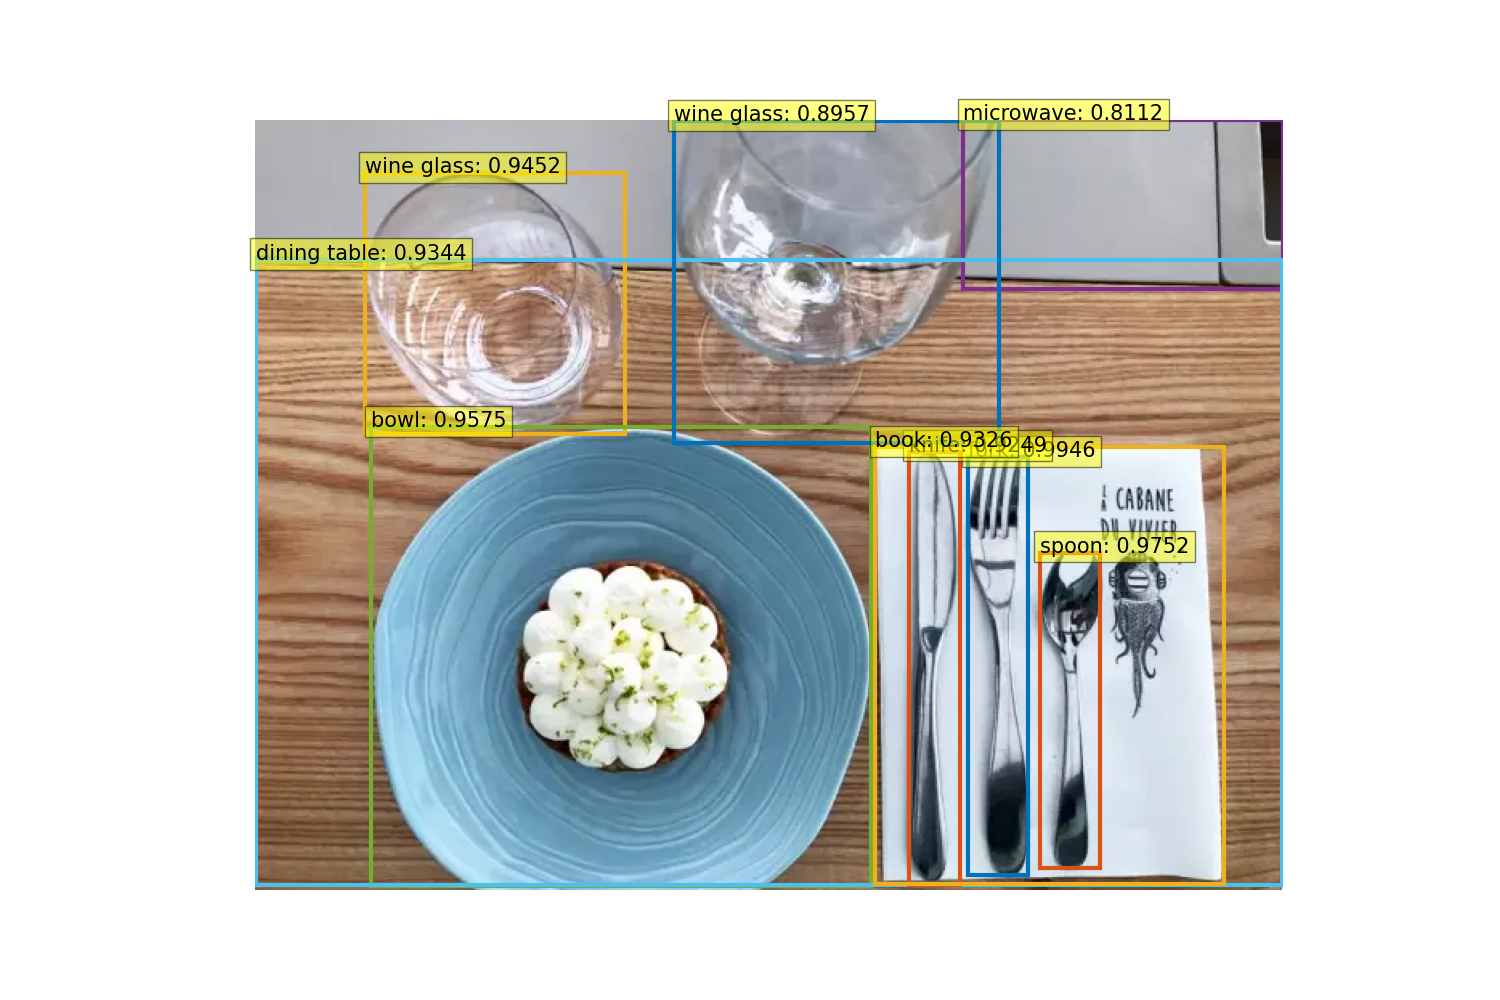

In [16]:
PIL.Image.open(bytes)